# US Visas

In [1]:
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

## Read CSV

In [2]:
visas_df = pd.read_csv("data/us_perm_visas.csv")

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


---
## In welchen US Bundesstasaten ist der Bedarf an Fachkräften am größten?
Die benötigten Spalten sind dafür:
- employer_state

Werfen wir einen Blick in employer_state:



In [3]:
print(visas_df['employer_state'].value_counts())

print(visas_df['employer_state'].describe(include=[object]))

print(visas_df['employer_state'].head())

CALIFORNIA                  51127
CA                          42366
TEXAS                       25082
TX                          20099
NEW JERSEY                  16271
                            ...  
NORTHERN MARIANA ISLANDS       22
VI                             18
BRITISH COLUMBIA                3
MARSHALL ISLANDS                1
BC                              1
Name: employer_state, Length: 113, dtype: int64
count         374320
unique           113
top       CALIFORNIA
freq           51127
Name: employer_state, dtype: object
0    NY
1    NY
2    VA
3    NY
4    NY
Name: employer_state, dtype: object


It becomes apparent, that abbreviations are used in the mix with the regular state names.
We'll have to translate the values to either only-abbreviation-values or long notations only.

We have found online a table which shows  all abbreviations of the US states: https://docs.omnisci.com/v4.1.1/3_apdx_states.html

Let's read it into a dataframe.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

table_MN = pd.read_html('https://docs.omnisci.com/v4.1.1/3_apdx_states.html')

In [5]:
print(f'Total tables: {len(table_MN)}')

Total tables: 2


pandas found two tables on the specified website

Let's try it once more, but now with a specified keyword.

In [6]:
table_MN = pd.read_html('https://docs.omnisci.com/v4.1.1/3_apdx_states.html', match='Abbreviation')
print(f'Total tables: {len(table_MN)}')

Total tables: 1


Jackpot 🎉

Next steps: Convert it to a dataframe.

In [7]:
states_abbreviations_df = table_MN[0]
states_abbreviations_df.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [8]:
states_abbreviations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         52 non-null     object
 1   Abbreviation  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


We need to convert the State names into Uppercase Values

In [9]:
states_abbreviations_df['State'] = states_abbreviations_df['State'].str.upper()

Now we'll create a dictionary for all lookup values, so pandas know what it should replace, with which values.
We chose to use replace all names with their abbreviations. So that typos in the state names won't be replaced and we can still analyze them.

In [10]:
#create a dictionary from the lookup
repl = states_abbreviations_df.set_index('State')['Abbreviation'].to_dict()

In [11]:
visas_df['employer_state'] = visas_df['employer_state'].replace(repl)

In [12]:
visas_df['employer_state'].value_counts()

CA                          93493
TX                          45181
NJ                          30135
NY                          28075
WA                          17113
                            ...  
NORTHERN MARIANA ISLANDS       22
VI                             18
BRITISH COLUMBIA                3
MARSHALL ISLANDS                1
BC                              1
Name: employer_state, Length: 61, dtype: int64

The Data transformation worked 😃, but there's still some work to do.
It seems as some states were not represented in the abbreviation table.
Let's take a closer look.

All abbreviations are two letters long. We have to look out for all values with more than two letters.

In [13]:

df_temp = pd.DataFrame(visas_df.loc[visas_df['employer_state'].str.len() >2, 'employer_state'])

In [14]:
df_temp.value_counts()

employer_state          
GUAM                        138
VIRGIN ISLANDS               49
NORTHERN MARIANA ISLANDS     22
BRITISH COLUMBIA              3
MARSHALL ISLANDS              1
dtype: int64

In [15]:
del df_temp

The remaining entries are foreign territories of the USA. These have no official abbreviation.
Fortunately there are no Typos in this column, because every other entry could be matched.

Außengebiet der Vereinigten Staaten

Territories of the United States
https://en.wikipedia.org/wiki/Territories_of_the_United_States




We converted the spellings of the US states. Now it's time to visualize the results.
The visualisation will cover 61 unique values, so we'll choose a classic bar chart.


In [16]:

unique_values_df = visas_df['employer_state'].value_counts().rename_axis('unique values').reset_index(name='counts')
unique_values_df

,unique values,counts
0,CA,93493
1,TX,45181
2,NJ,30135
3,NY,28075
4,WA,17113
...,...,...
56,NORTHERN MARIANA ISLANDS,22
57,VI,18
58,BRITISH COLUMBIA,3
59,MARSHALL ISLANDS,1


<AxesSubplot:title={'center':'Count of Employer states'}, xlabel='unique values'>

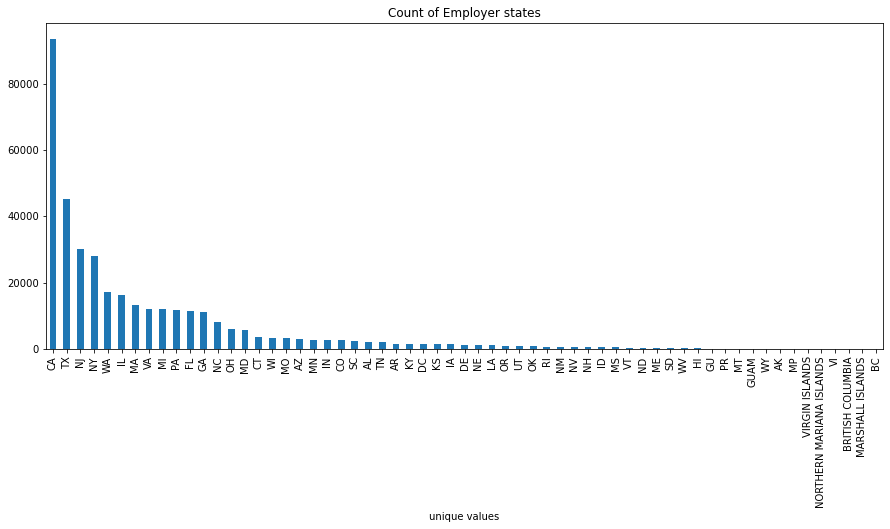

In [17]:
unique_values_df.sort_values(by='counts', ascending = False).plot(kind='bar', x='unique values', y='counts', legend=None, title='Count of Employer states', figsize=(15,6))
